# General Goals for EDA1

1. Clarify assumptions in data
2. Stats and Insights into TSLA and Tweets
    
-----

Note that we cannot use Retweets and Favorite Counts as that information is not available to use at his time of tweet.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
tsla = pd.read_csv("../../data/stock_price/TSLA.csv")

In [3]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tsla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2.204000e+03
mean,176.132722,179.194950,172.888902,176.132972,176.132972,5.093375e+06
std,115.491848,117.277472,113.571525,115.495920,115.495920,4.541442e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.137499,33.987502,32.530001,33.220001,33.220001,1.584300e+06
50%,205.550003,209.084999,202.500000,205.299995,205.299995,4.193900e+06
75%,262.399994,265.667511,257.804993,262.072502,262.072502,6.908300e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [5]:
# change date column into pandas datetime
tsla["Date"] = pd.to_datetime(tsla["Date"])

## Plot TSLA Stock price since IPO

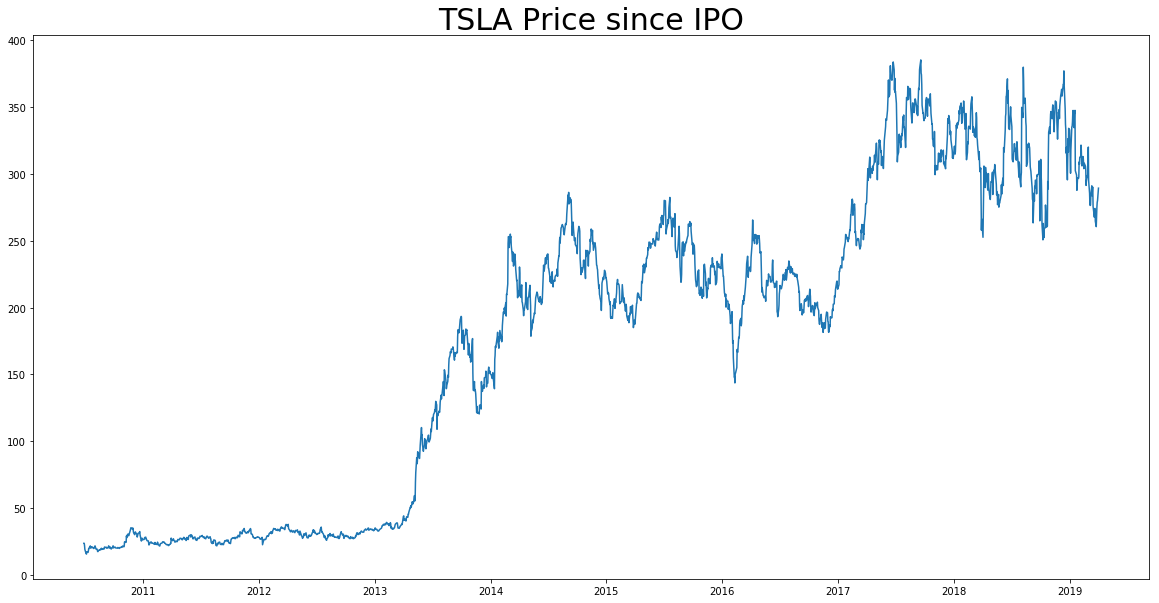

In [6]:
x = tsla['Date']
y = tsla['Close']

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title('TSLA Price since IPO', fontsize=30)
plt.show()

## Exploring general effect of April Fool's Day

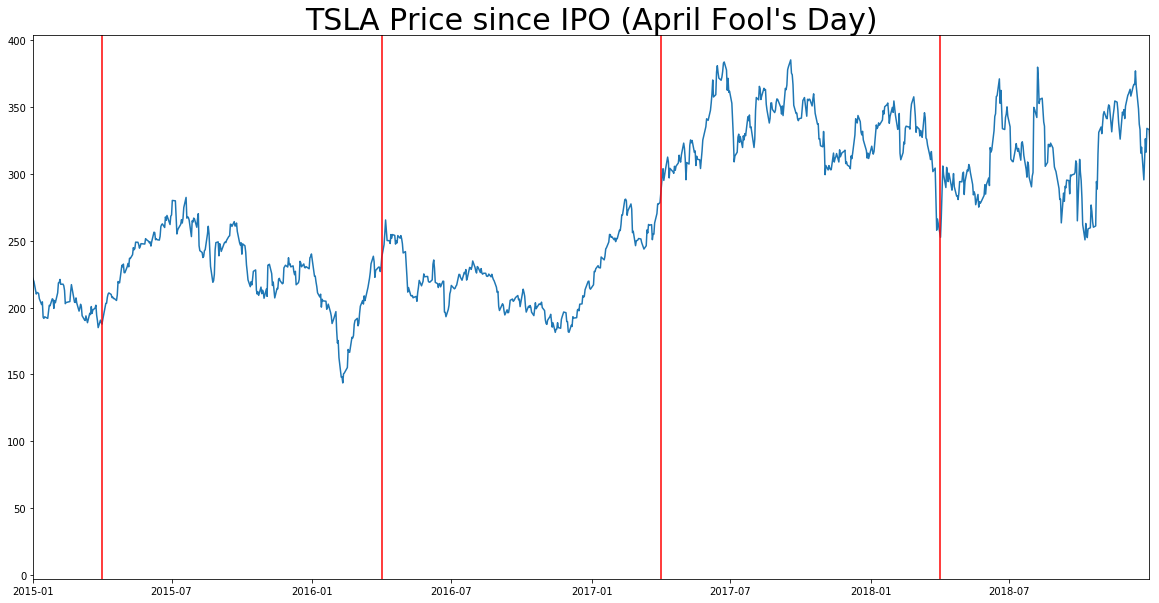

In [7]:
# exploring April Fool's Day over the years

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title("TSLA Price since IPO (April Fool's Day)", fontsize=30)
ax.set_xlim(('2015-01-01 00:00:00', '2018-12-31 00:00:00'))

ax.axvline(x='2015-04-01 00:00:00', color='red')
ax.axvline(x='2016-04-01 00:00:00', color='red')
ax.axvline(x='2017-04-01 00:00:00', color='red')
ax.axvline(x='2018-04-01 00:00:00', color='red')

plt.show()

## Exploring +/- 15 days of April Fool's Day

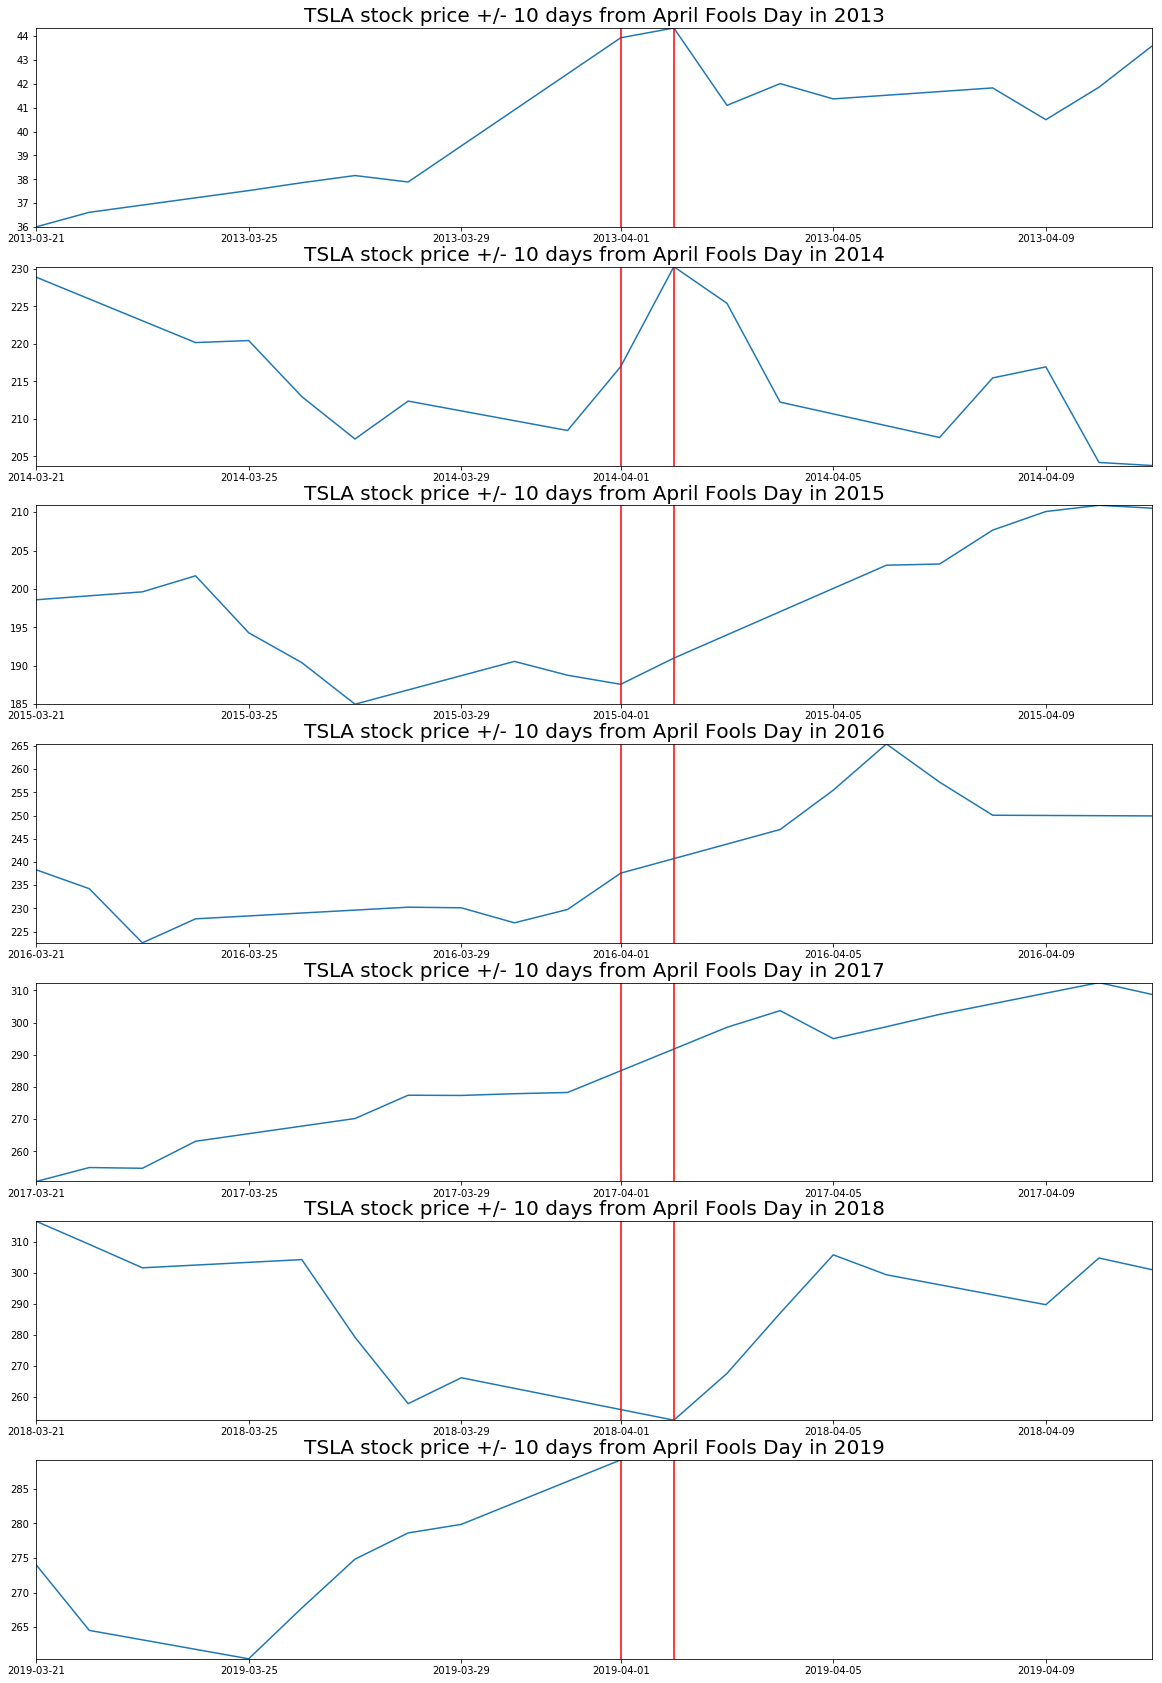

In [8]:
years = list(range(2013, 2020))

fig, ax = plt.subplots(nrows=len(years), ncols=1, figsize=(20,30))
idx = 0

for year in years:
    start_date = str(year) + '-03-21 00:00:00'
    end_date = str(year) + '-04-11 00:00:00'
    
    start_day = str(year) + '-04-01 00:00:00'
    end_day = str(year) + '-04-01 23:59:59'
    
    px_range = tsla[(tsla["Date"]>=start_date) & (tsla["Date"]<=end_date)]['Close']
    
    y_min, y_max = min(px_range), max(px_range)

    ax[idx].plot(x, y)
    ax[idx].set_title('TSLA stock price +/- 10 days from April Fools Day in ' + str(year), fontsize=20)
    ax[idx].set_xlim((start_date, end_date))
    ax[idx].set_ylim((y_min, y_max))

    ax[idx].axvline(x=start_day, color='red')
    ax[idx].axvline(x=end_day, color='red')
    
    idx += 1
    
plt.show()

## Exploring Day to Day Price Change

In [9]:
tsla_interday = tsla.copy()
tsla_interday = tsla_interday.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
tsla_interday["Close1"] = tsla_interday["Close"].shift(-1)
tsla_interday["%change"] = (tsla_interday["Close1"]/tsla_interday["Close"]-1)*100
tsla_interday.head()

,Date,Close,Close1,%change
0,2010-06-29,23.889999,23.830000,-0.251147
1,2010-06-30,23.830000,21.959999,-7.847256
2,2010-07-01,21.959999,19.200001,-12.568297
3,2010-07-02,19.200001,16.110001,-16.093749
4,2010-07-06,16.110001,15.800000,-1.924277


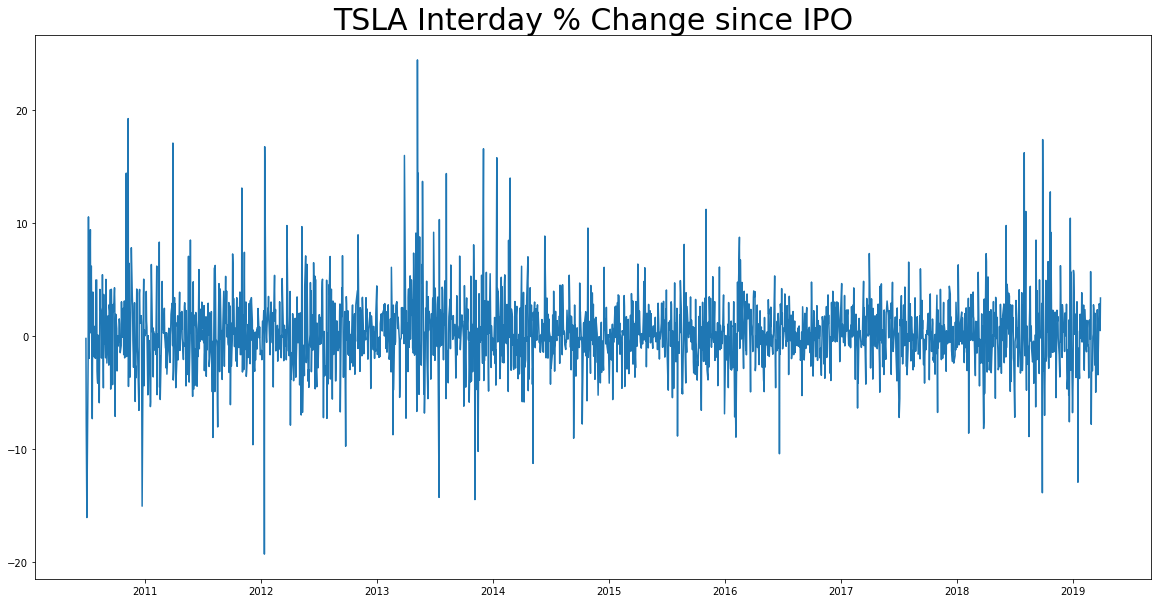

In [10]:
x = tsla_interday['Date']
y = tsla_interday['%change']

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title('TSLA Interday % Change since IPO', fontsize=30)
plt.show()

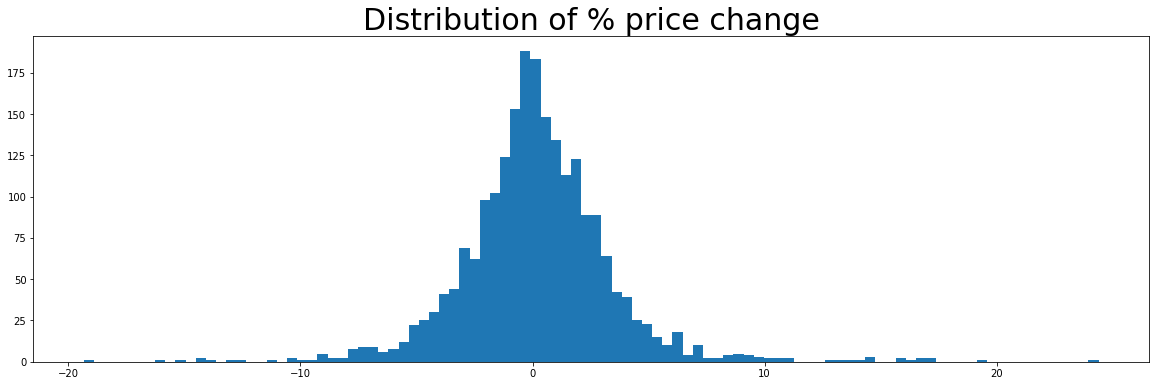

In [11]:
# checking if there are significant occurances that have substantial price change
fig, ax = plt.subplots(figsize=(20,6))

ax.hist(tsla_interday['%change'], bins=100)
ax.set_title('Distribution of % price change', fontsize=30)
plt.show()

#### Insights:

1. Inter-day % change seems to be very noisy - no obvious insights.

2. The distribution of % price change seem appear to be fairly normal even with bins=100.

## Exploring Price intra day change between Open and Close

In [12]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [13]:
tsla_intraday = tsla.copy()
tsla_intraday["Change"] = tsla_intraday["Close"]-tsla_intraday["Open"]
tsla_intraday["%Change"] = tsla_intraday["Change"]/tsla_intraday["Open"]*100
tsla_intraday.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,%Change
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,4.889999,25.736837
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,-1.960001,-7.599848
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,-3.040001,-12.160004
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,-3.799999,-16.521735
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,-3.889999,-19.449995


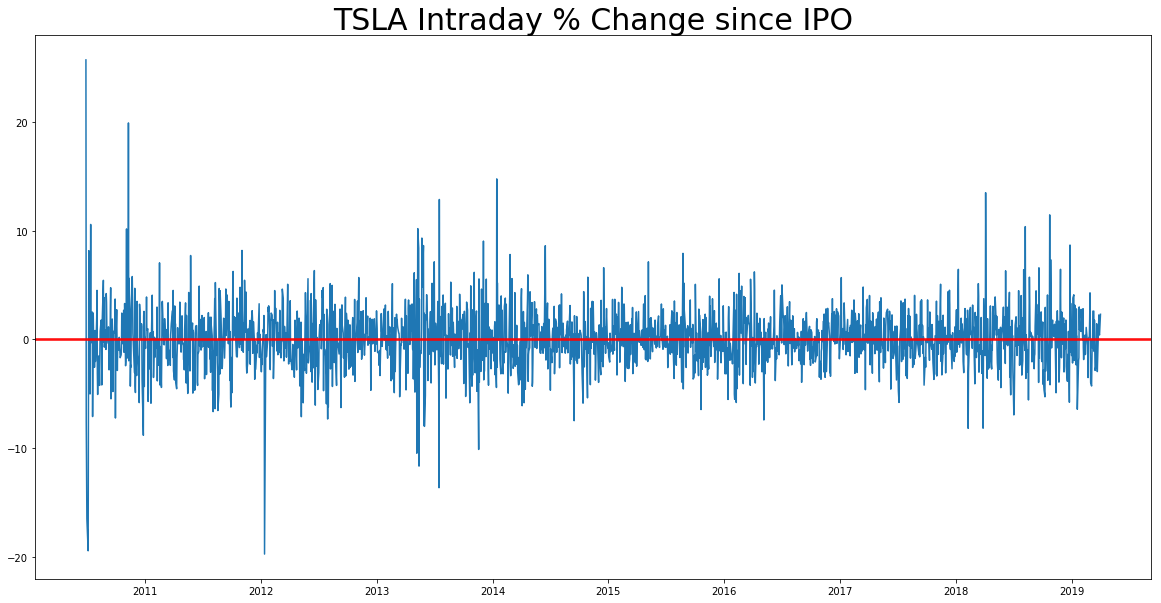

In [14]:
x = tsla_interday['Date']
y = tsla_intraday["%Change"]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title('TSLA Intraday % Change since IPO', fontsize=30)
ax.axhline(y=0.075, color='red')
ax.axhline(y=-0.075, color='red')
plt.show()

#### Insights:

1. Intra-day % change seems less noisy than inter-day % change.

2. There are a few clear events that caused a huge intra day spike. Let's see if they match the dates of the infamous tweets by Musk.

3. Should we use this an an indicator, be aware that we will be dealing with highly imbalance classes.

## Exploring Price intra day volatility

In [15]:
tsla_intraday.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,%Change
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,4.889999,25.736837
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,-1.960001,-7.599848
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,-3.040001,-12.160004
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,-3.799999,-16.521735
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,-3.889999,-19.449995


In [16]:
tsla_intraday["Range"] = tsla_intraday["High"]-tsla_intraday["Low"]
tsla_intraday["%Range"] = tsla_intraday["Range"]/tsla_intraday["Open"]
tsla_intraday.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,%Change,Range,%Range
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,4.889999,25.736837,7.459999,0.392632
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,-1.960001,-7.599848,7.120001,0.276076
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,-3.040001,-12.160004,5.650000,0.226000
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,-3.799999,-16.521735,4.390001,0.190870
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,-3.889999,-19.449995,4.170000,0.208500


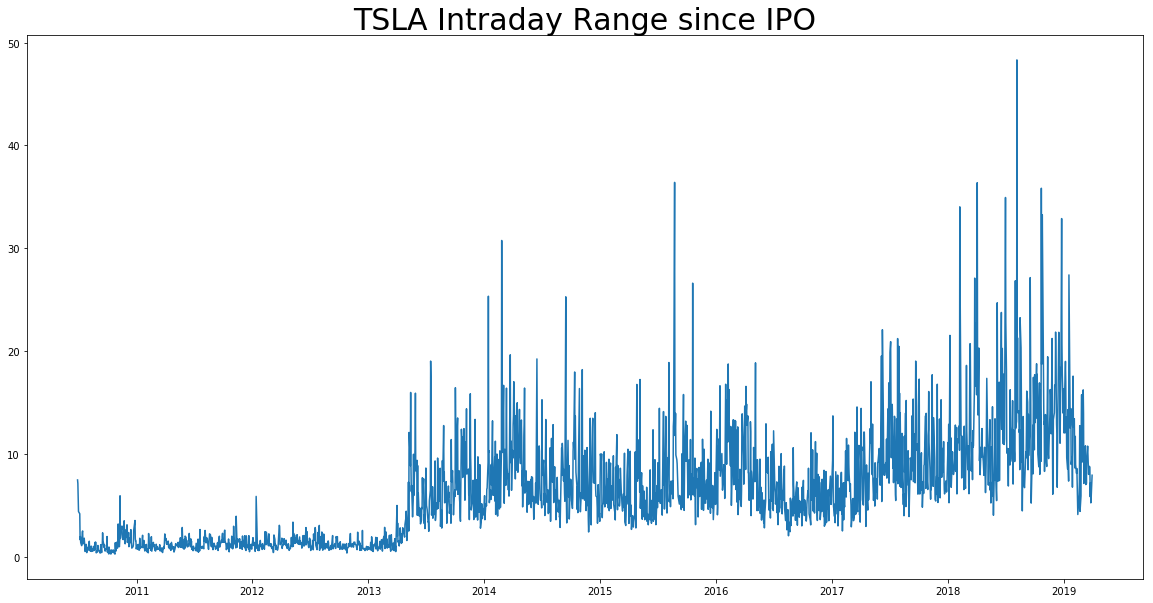

In [17]:
x = tsla_interday['Date']
y = tsla_intraday["Range"]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title('TSLA Intraday Range since IPO', fontsize=30)
plt.show()

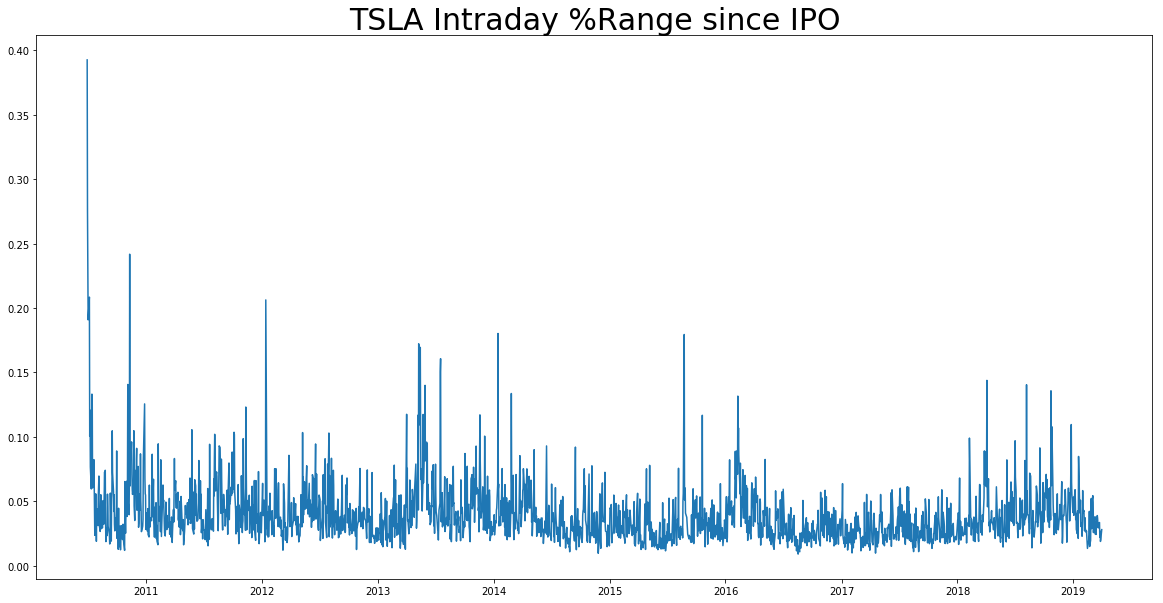

In [18]:
x = tsla_interday['Date']
y = tsla_intraday["%Range"]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x, y)
ax.set_title('TSLA Intraday %Range since IPO', fontsize=30)
plt.show()

#### Insights:

1. By normalizing by the Open Price, %Range eliminates the effect of concept drifts over time and allow us to flag days with high change.

# Elon Musk's Tweets

In [19]:
elon = pd.read_csv("../../data/twitter/elon_clean.csv")

In [20]:
elon.head()

,username,date,retweets,favorites,text,mentions,hashtags,permalink
0,elonmusk,2019-04-02 20:38,993,9263,Dogecoin value may vary https://www. theonion....,NaN,NaN,https://twitter.com/elonmusk/status/1113178951...
1,elonmusk,2019-04-02 20:16,7238,55271,Dogecoin rulz pic.twitter.com/flWWUgAgLU,NaN,NaN,https://twitter.com/elonmusk/status/1113173498...
2,elonmusk,2019-04-02 19:40,368,9159,Uh oh,NaN,NaN,https://twitter.com/elonmusk/status/1113164389...
3,elonmusk,2019-04-02 09:24,1317,6176,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,NaN,https://twitter.com/elonmusk/status/1113009339...
4,elonmusk,2019-04-02 09:21,1557,26925,Yup https:// twitter.com/nasa/status/11 128601...,NaN,NaN,https://twitter.com/elonmusk/status/1113008497...


In [21]:
# change date column into pandas datetime

elon["date"] = pd.to_datetime(elon["date"])

## Plot Tweet count over years vs TSLA price

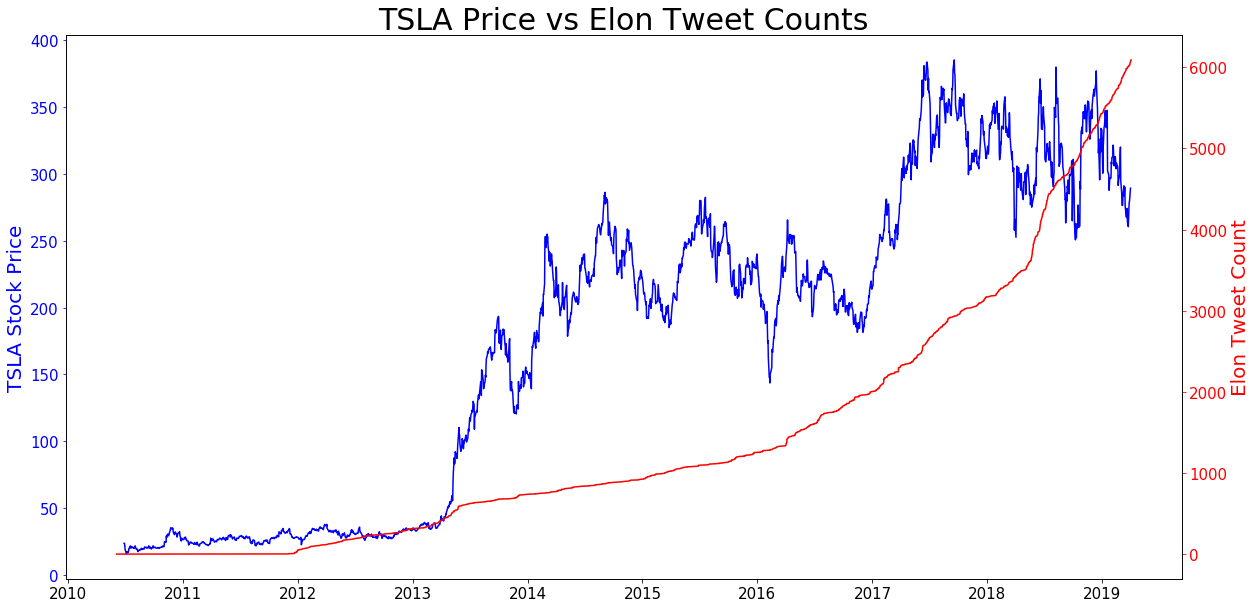

In [22]:
fig, ax1 = plt.subplots(figsize=(20,10))

x1 = tsla['Date']
y1 = tsla['Close']

ax1.set_title('TSLA Price vs Elon Tweet Counts', fontsize=30)

l1 = ax1.plot(x1,y1,color='blue')
ax1.set_ylabel('TSLA Stock Price',color='blue', fontsize=20)
ax1.tick_params('y', colors='blue', labelsize=15)
ax1.tick_params('x', labelsize=15)

x2 = elon["date"].sort_values(ascending=True)
y2 = list(range(1,len(elon["date"])+1))

ax2 = ax1.twinx() # create second axis for y2
l2, = ax2.plot(x2, y2, color='red')
ax2.set_ylabel('Elon Tweet Count',color='red', size=20)
ax2.tick_params('y', colors='red', labelsize=15)

plt.show()

## Extracting Musk's 10 most significant Tweets in 2018

In [23]:
elon[(elon["date"]>='2018-04-01') & (elon["date"]<='2018-04-02')]

,username,date,retweets,favorites,text,mentions,hashtags,permalink
2659,elonmusk,2018-04-01 23:35:00,159,2855,What about this? https://www. youtube.com/watc...,NaN,NaN,https://twitter.com/elonmusk/status/9805894636...
2660,elonmusk,2018-04-01 23:20:00,824,3596,Elon University is a real place,NaN,NaN,https://twitter.com/elonmusk/status/9805856712...
2661,elonmusk,2018-04-01 22:14:00,318,7340,Coming soon to Tesla merch. Free shots in stor...,NaN,NaN,https://twitter.com/elonmusk/status/9805690828...
2662,elonmusk,2018-04-01 22:11:00,117,2999,As you wish,NaN,NaN,https://twitter.com/elonmusk/status/9805683825...
2663,elonmusk,2018-04-01 22:05:00,40,2195,It’s the best,NaN,NaN,https://twitter.com/elonmusk/status/9805667858...
2664,elonmusk,2018-04-01 22:02:00,20202,117427,Elon was found passed out against a Tesla Mode...,NaN,NaN,https://twitter.com/elonmusk/status/9805661166...
2665,elonmusk,2018-04-01 22:02:00,4985,47133,"There are many chapters of bankruptcy and, as ...",NaN,NaN,https://twitter.com/elonmusk/status/9805661033...
2666,elonmusk,2018-04-01 22:02:00,23815,128475,"Tesla Goes Bankrupt Palo Alto, California, Apr...",NaN,NaN,https://twitter.com/elonmusk/status/9805661011...
2667,elonmusk,2018-04-01 18:51:00,8842,85308,Important news in a few hours …,NaN,NaN,https://twitter.com/elonmusk/status/9805180203...


#### Insights:

1. One way to filter impactful tweets from Musk is to see the number of favorites and retweets.
2. Which is a better metric? Can we use both favourites and retweets? Are they correlated?

## Correlation between favourite and retweets

In [24]:
# correlation value
elon['retweets'].corr(elon["favorites"])

0.9066060644408973

In [25]:
# check top 10 retweets
elon.sort_values("retweets", ascending=False).head(10)

,username,date,retweets,favorites,text,mentions,hashtags,permalink
1187,elonmusk,2018-10-19 21:01:00,387919,1204279,Had to been done ur welcome pic.twitter.com/7j...,NaN,NaN,https://twitter.com/elonmusk/status/1053390822...
3620,elonmusk,2017-06-01 20:02:00,218046,521779,Am departing presidential councils. Climate ch...,NaN,NaN,https://twitter.com/elonmusk/status/8703699158...
2840,elonmusk,2018-02-06 21:44:00,168012,473885,"View from SpaceX Launch Control. Apparently, t...",NaN,NaN,https://twitter.com/elonmusk/status/9609927155...
642,elonmusk,2019-01-03 23:04:00,166398,681744,There are no coincidences pic.twitter.com/9AEb...,NaN,NaN,https://twitter.com/elonmusk/status/1080963075...
1153,elonmusk,2018-10-22 22:33:00,151923,470847,i anime,NaN,NaN,https://twitter.com/elonmusk/status/1054501056...
501,elonmusk,2019-01-27 22:54:00,143733,702622,Host meme review? pic.twitter.com/k2SFtIUh1k,NaN,NaN,https://twitter.com/elonmusk/status/1089657821...
3045,elonmusk,2017-11-17 06:23:00,115722,452400,0 to 100 km/h in 1.9 sec pic.twitter.com/xTOTD...,NaN,NaN,https://twitter.com/elonmusk/status/9314074908...
216,elonmusk,2019-03-06 09:11:00,115541,777156,"Yeah, I lift a little … pic.twitter.com/UAJdv8...",NaN,NaN,https://twitter.com/elonmusk/status/1103221573...
2594,elonmusk,2018-04-25 17:43:00,105169,459484,Oh btw I’m building a cyborg dragon,NaN,NaN,https://twitter.com/elonmusk/status/9891981186...
2892,elonmusk,2018-01-28 06:03:00,97526,374582,The rumor that I’m secretly creating a zombie ...,NaN,NaN,https://twitter.com/elonmusk/status/9574943640...


In [26]:
# check top 10 favorites
elon.sort_values("favorites", ascending=False).head(10)

,username,date,retweets,favorites,text,mentions,hashtags,permalink
1187,elonmusk,2018-10-19 21:01:00,387919,1204279,Had to been done ur welcome pic.twitter.com/7j...,NaN,NaN,https://twitter.com/elonmusk/status/1053390822...
216,elonmusk,2019-03-06 09:11:00,115541,777156,"Yeah, I lift a little … pic.twitter.com/UAJdv8...",NaN,NaN,https://twitter.com/elonmusk/status/1103221573...
501,elonmusk,2019-01-27 22:54:00,143733,702622,Host meme review? pic.twitter.com/k2SFtIUh1k,NaN,NaN,https://twitter.com/elonmusk/status/1089657821...
642,elonmusk,2019-01-03 23:04:00,166398,681744,There are no coincidences pic.twitter.com/9AEb...,NaN,NaN,https://twitter.com/elonmusk/status/1080963075...
3620,elonmusk,2017-06-01 20:02:00,218046,521779,Am departing presidential councils. Climate ch...,NaN,NaN,https://twitter.com/elonmusk/status/8703699158...
2840,elonmusk,2018-02-06 21:44:00,168012,473885,"View from SpaceX Launch Control. Apparently, t...",NaN,NaN,https://twitter.com/elonmusk/status/9609927155...
1153,elonmusk,2018-10-22 22:33:00,151923,470847,i anime,NaN,NaN,https://twitter.com/elonmusk/status/1054501056...
988,elonmusk,2018-11-12 19:26:00,90166,465965,"Rest in peace, Stan Lee. The many worlds of im...",NaN,NaN,https://twitter.com/elonmusk/status/1062064062...
2594,elonmusk,2018-04-25 17:43:00,105169,459484,Oh btw I’m building a cyborg dragon,NaN,NaN,https://twitter.com/elonmusk/status/9891981186...
3045,elonmusk,2017-11-17 06:23:00,115722,452400,0 to 100 km/h in 1.9 sec pic.twitter.com/xTOTD...,NaN,NaN,https://twitter.com/elonmusk/status/9314074908...


In [27]:
# comparing how many common tweets share Top 10 retweets and Top 10 favourites
top10_retweets = elon.sort_values("retweets", ascending=False).head(10).index.tolist()
top10_favorites = elon.sort_values("favorites", ascending=False).head(10).index.tolist()

common10 = list(set(top10_retweets).intersection(top10_favorites))
print(len(common10),"out of 10 tweets in the Top 10 are common, they are:", common10)

9 out of 10 tweets in the Top 10 are common, they are: [1153, 642, 1187, 3620, 2594, 3045, 2840, 501, 216]


In [28]:
# comparing how many common tweets share Top 100 retweets and Top 100 favourites
top100_retweets = elon.sort_values("retweets", ascending=False).head(100).index.tolist()
top100_favorites = elon.sort_values("favorites", ascending=False).head(100).index.tolist()

common100 = list(set(top100_retweets).intersection(top100_favorites))
print(len(common100),"out of 10 tweets in the Top 10 are common, they are:", common100)

67 out of 10 tweets in the Top 10 are common, they are: [636, 1153, 642, 2950, 892, 2955, 2832, 1169, 657, 2838, 2840, 409, 154, 411, 412, 3361, 2594, 1187, 3620, 804, 291, 2598, 2217, 1323, 2862, 559, 305, 2098, 307, 310, 311, 439, 438, 1851, 444, 452, 1733, 1351, 456, 1225, 713, 2892, 205, 2766, 3405, 1746, 2387, 2898, 597, 216, 601, 1240, 3035, 988, 995, 3045, 746, 1131, 492, 3054, 1262, 495, 1139, 1779, 501, 1013, 2556]


In [29]:
# use a function to plot and see how the % of common tweets decrease as we consider a larger top size

top_counts = list(range(10, 6000, 10))
common_percent = []

for top_count in top_counts:
    top_retweets = elon.sort_values("retweets", ascending=False).head(top_count).index.tolist()
    top_favorites = elon.sort_values("favorites", ascending=False).head(top_count).index.tolist()
    common = list(set(top_retweets).intersection(top_favorites))
    common_percent.append(len(common)/top_count)

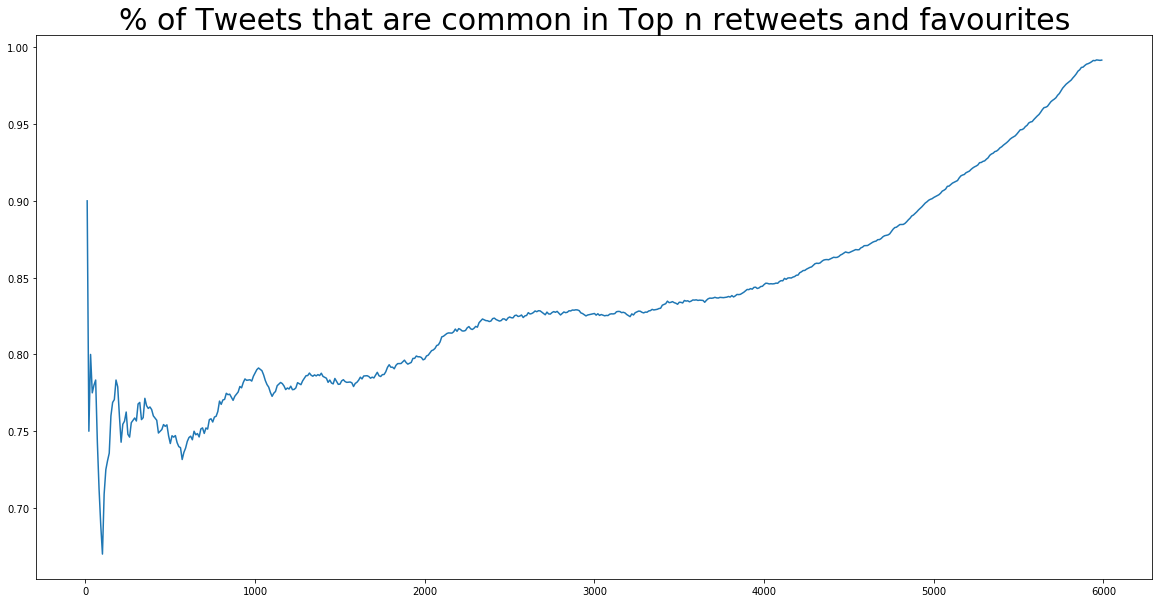

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(top_counts, common_percent)
ax.set_title('% of Tweets that are common in Top n retweets and favourites', fontsize=30)
plt.show()

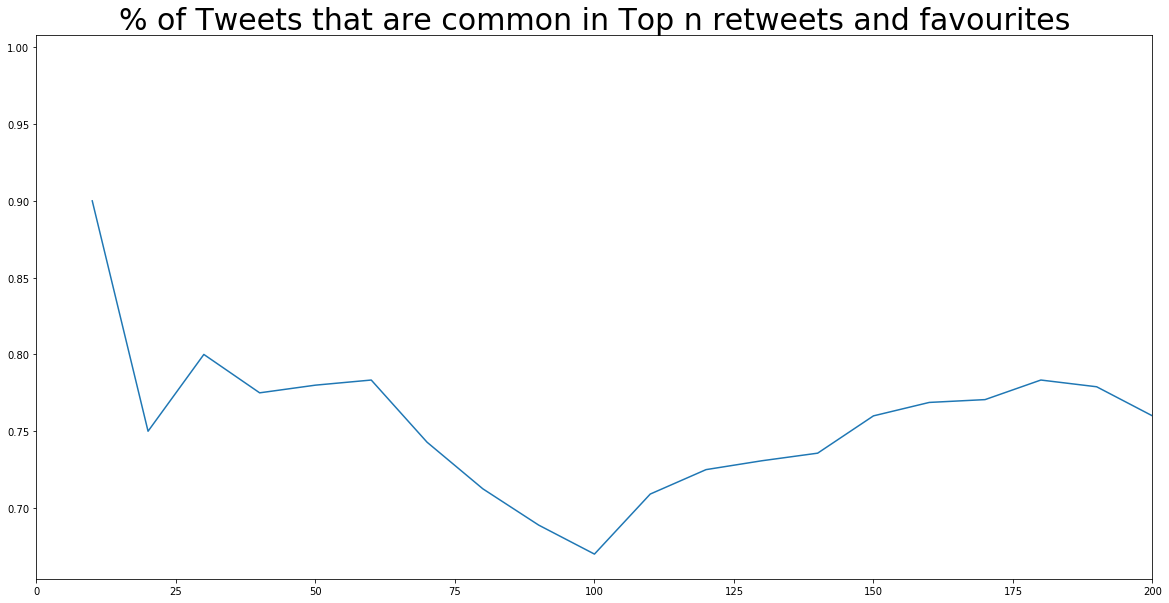

In [31]:
# let's zoom in to the top 100-200 maybe

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(top_counts, common_percent)
ax.set_title('% of Tweets that are common in Top n retweets and favourites', fontsize=30)
ax.set_xlim((0,200))
plt.show()

#### Insight:

1. At about 100, the % of tweets that are common start steadily increasing toward 1.0, which covers all tweets at ~6000.

2. Perhaps only the Top 10 tweets are 90% common.

3. Another cut-off point is at Top 60, after which the % common starts to drop to the minimal.


#### Should we use retweets*favorites?

## Normalize Retweet * Normalized Favourites

In [32]:
elon_norm = elon.copy()

min_retweets = min(elon_norm["retweets"])
max_retweets = max(elon_norm["retweets"])
elon_norm["norm_retweets"] = (elon_norm["retweets"]-min_retweets) / (max_retweets-min_retweets)

min_favorites = min(elon_norm["favorites"])
max_favorites = max(elon_norm["favorites"])
elon_norm["norm_favorites"] = (elon_norm["favorites"]-min_favorites) / (max_favorites-min_favorites)

elon_norm["tweet_score"] = elon_norm["norm_retweets"]*elon_norm["norm_favorites"]

In [33]:
elon_norm.head()

,username,date,retweets,favorites,text,mentions,hashtags,permalink,norm_retweets,norm_favorites,tweet_score
0,elonmusk,2019-04-02 20:38:00,993,9263,Dogecoin value may vary https://www. theonion....,NaN,NaN,https://twitter.com/elonmusk/status/1113178951...,0.002560,0.007691,0.000020
1,elonmusk,2019-04-02 20:16:00,7238,55271,Dogecoin rulz pic.twitter.com/flWWUgAgLU,NaN,NaN,https://twitter.com/elonmusk/status/1113173498...,0.018659,0.045895,0.000856
2,elonmusk,2019-04-02 19:40:00,368,9159,Uh oh,NaN,NaN,https://twitter.com/elonmusk/status/1113164389...,0.000949,0.007605,0.000007
3,elonmusk,2019-04-02 09:24:00,1317,6176,Dogecoin might be my fav cryptocurrency. It’s ...,NaN,NaN,https://twitter.com/elonmusk/status/1113009339...,0.003395,0.005128,0.000017
4,elonmusk,2019-04-02 09:21:00,1557,26925,Yup https:// twitter.com/nasa/status/11 128601...,NaN,NaN,https://twitter.com/elonmusk/status/1113008497...,0.004014,0.022357,0.000090


In [34]:
# check top 10 favorites
elon_norm.sort_values("tweet_score", ascending=False).head(10)

,username,date,retweets,favorites,text,mentions,hashtags,permalink,norm_retweets,norm_favorites,tweet_score
1187,elonmusk,2018-10-19 21:01:00,387919,1204279,Had to been done ur welcome pic.twitter.com/7j...,NaN,NaN,https://twitter.com/elonmusk/status/1053390822...,1.000000,1.000000,1.000000
3620,elonmusk,2017-06-01 20:02:00,218046,521779,Am departing presidential councils. Climate ch...,NaN,NaN,https://twitter.com/elonmusk/status/8703699158...,0.562092,0.433270,0.243538
642,elonmusk,2019-01-03 23:04:00,166398,681744,There are no coincidences pic.twitter.com/9AEb...,NaN,NaN,https://twitter.com/elonmusk/status/1080963075...,0.428950,0.566101,0.242829
501,elonmusk,2019-01-27 22:54:00,143733,702622,Host meme review? pic.twitter.com/k2SFtIUh1k,NaN,NaN,https://twitter.com/elonmusk/status/1089657821...,0.370523,0.583438,0.216177
216,elonmusk,2019-03-06 09:11:00,115541,777156,"Yeah, I lift a little … pic.twitter.com/UAJdv8...",NaN,NaN,https://twitter.com/elonmusk/status/1103221573...,0.297848,0.645329,0.192210
2840,elonmusk,2018-02-06 21:44:00,168012,473885,"View from SpaceX Launch Control. Apparently, t...",NaN,NaN,https://twitter.com/elonmusk/status/9609927155...,0.433111,0.393501,0.170429
1153,elonmusk,2018-10-22 22:33:00,151923,470847,i anime,NaN,NaN,https://twitter.com/elonmusk/status/1054501056...,0.391636,0.390978,0.153121
3045,elonmusk,2017-11-17 06:23:00,115722,452400,0 to 100 km/h in 1.9 sec pic.twitter.com/xTOTD...,NaN,NaN,https://twitter.com/elonmusk/status/9314074908...,0.298315,0.375660,0.112065
2594,elonmusk,2018-04-25 17:43:00,105169,459484,Oh btw I’m building a cyborg dragon,NaN,NaN,https://twitter.com/elonmusk/status/9891981186...,0.271111,0.381542,0.103440
988,elonmusk,2018-11-12 19:26:00,90166,465965,"Rest in peace, Stan Lee. The many worlds of im...",NaN,NaN,https://twitter.com/elonmusk/status/1062064062...,0.232435,0.386924,0.089935


## Distribution of retweets and favorites

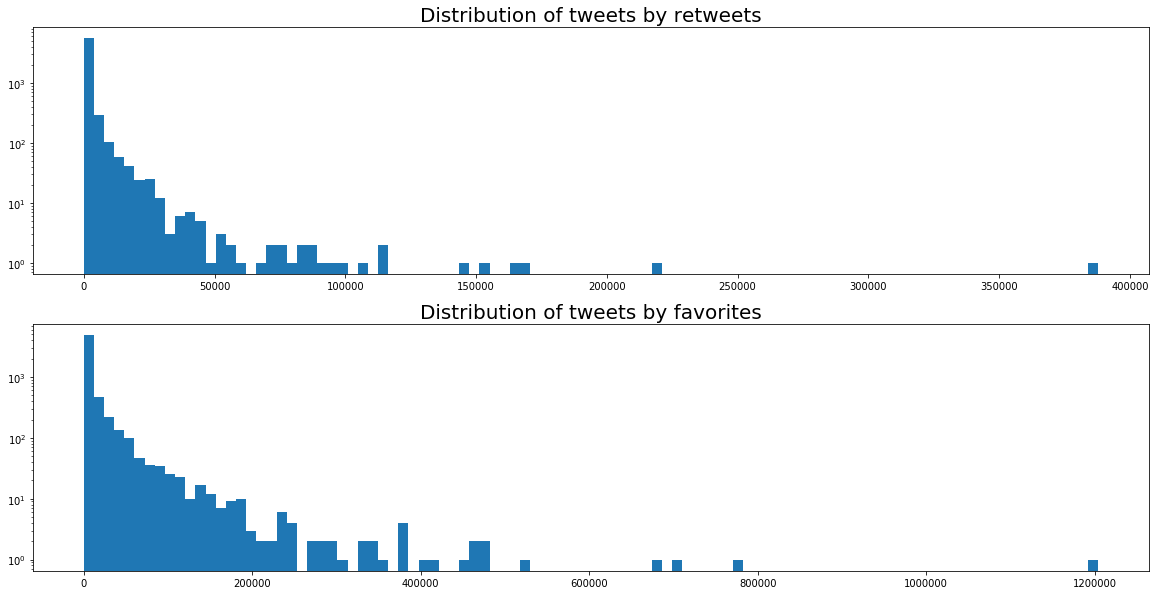

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

ax[0].hist(elon["retweets"], bins=100)
ax[0].set_yscale('log')
ax[0].set_title('Distribution of tweets by retweets', fontsize=20)

ax[1].hist(elon["favorites"], bins=100)
ax[1].set_yscale('log')
ax[1].set_title('Distribution of tweets by favorites', fontsize=20)

plt.show()

In [36]:
elon_norm.sort_values("tweet_score", ascending=False).head(100)

,username,date,retweets,favorites,text,mentions,hashtags,permalink,norm_retweets,norm_favorites,tweet_score
1187,elonmusk,2018-10-19 21:01:00,387919,1204279,Had to been done ur welcome pic.twitter.com/7j...,NaN,NaN,https://twitter.com/elonmusk/status/1053390822...,1.000000,1.000000,1.000000
3620,elonmusk,2017-06-01 20:02:00,218046,521779,Am departing presidential councils. Climate ch...,NaN,NaN,https://twitter.com/elonmusk/status/8703699158...,0.562092,0.433270,0.243538
642,elonmusk,2019-01-03 23:04:00,166398,681744,There are no coincidences pic.twitter.com/9AEb...,NaN,NaN,https://twitter.com/elonmusk/status/1080963075...,0.428950,0.566101,0.242829
501,elonmusk,2019-01-27 22:54:00,143733,702622,Host meme review? pic.twitter.com/k2SFtIUh1k,NaN,NaN,https://twitter.com/elonmusk/status/1089657821...,0.370523,0.583438,0.216177
216,elonmusk,2019-03-06 09:11:00,115541,777156,"Yeah, I lift a little … pic.twitter.com/UAJdv8...",NaN,NaN,https://twitter.com/elonmusk/status/1103221573...,0.297848,0.645329,0.192210
2840,elonmusk,2018-02-06 21:44:00,168012,473885,"View from SpaceX Launch Control. Apparently, t...",NaN,NaN,https://twitter.com/elonmusk/status/9609927155...,0.433111,0.393501,0.170429
1153,elonmusk,2018-10-22 22:33:00,151923,470847,i anime,NaN,NaN,https://twitter.com/elonmusk/status/1054501056...,0.391636,0.390978,0.153121
3045,elonmusk,2017-11-17 06:23:00,115722,452400,0 to 100 km/h in 1.9 sec pic.twitter.com/xTOTD...,NaN,NaN,https://twitter.com/elonmusk/status/9314074908...,0.298315,0.375660,0.112065
2594,elonmusk,2018-04-25 17:43:00,105169,459484,Oh btw I’m building a cyborg dragon,NaN,NaN,https://twitter.com/elonmusk/status/9891981186...,0.271111,0.381542,0.103440
988,elonmusk,2018-11-12 19:26:00,90166,465965,"Rest in peace, Stan Lee. The many worlds of im...",NaN,NaN,https://twitter.com/elonmusk/status/1062064062...,0.232435,0.386924,0.089935


In [37]:
elon[(elon["retweets"]>15000) & (elon["favorites"]>85000)].shape

(128, 8)

#### Insights

1. The tweet Musk made about "funding secured" wasn't even amongst the Top 100 tweets.
2. There are alot of popular Tweets that are highly retweeted or favorited, but have got nothing to do with Tesla.
3. These tweets do not affect the TSLA price, and are irrelevant to our model. Including them could potentially create substantial noise.

## Count number of Tweets that includes the word Tesla

In [38]:
elon_tesla = elon[elon["text"].str.contains("Tesla")]
elon_tesla.shape

(669, 8)

In [39]:
# check top 10 retweets with word Tesla
elon_tesla.sort_values("retweets", ascending=False).head(10)

,username,date,retweets,favorites,text,mentions,hashtags,permalink
2598,elonmusk,2018-04-18 23:22:00,35381,160096,Tesla batteries are currently live & deliverin...,NaN,NaN,https://twitter.com/elonmusk/status/9867469091...
1240,elonmusk,2018-10-12 18:03:00,28283,176003,Tesla exists to help reduce risk of catastroph...,NaN,NaN,https://twitter.com/elonmusk/status/1050809258...
892,elonmusk,2018-11-29 02:25:00,28018,190918,You can summon your Tesla from your phone. Onl...,NaN,NaN,https://twitter.com/elonmusk/status/1067967799...
3051,elonmusk,2017-11-12 21:30:00,26385,117845,Tesla Semi Truck unveil to be webcast live on ...,NaN,NaN,https://twitter.com/elonmusk/status/9298237576...
2489,elonmusk,2018-05-14 20:54:00,24655,112954,It’s super messed up that a Tesla crash result...,NaN,NaN,https://twitter.com/elonmusk/status/9961315864...
3044,elonmusk,2017-11-17 06:41:00,23885,120022,Tesla Semi pic.twitter.com/7VLz7F46Ji,NaN,NaN,https://twitter.com/elonmusk/status/9314120200...
2666,elonmusk,2018-04-01 22:02:00,23815,128475,"Tesla Goes Bankrupt Palo Alto, California, Apr...",NaN,NaN,https://twitter.com/elonmusk/status/9805661011...
2664,elonmusk,2018-04-01 22:02:00,20202,117427,Elon was found passed out against a Tesla Mode...,NaN,NaN,https://twitter.com/elonmusk/status/9805661166...
352,elonmusk,2019-02-20 00:02:00,19220,227229,4000 Tesla cars loading in SF for Europe pic.t...,NaN,NaN,https://twitter.com/elonmusk/status/1098009983...
30,elonmusk,2019-03-30 21:37:00,17629,206634,Tesla Semi delivering Tesla cars pic.twitter.c...,NaN,NaN,https://twitter.com/elonmusk/status/1112106548...


In [40]:
# check top 10 favorites with word Tesla
elon_tesla.sort_values("favorites", ascending=False).head(10)

,username,date,retweets,favorites,text,mentions,hashtags,permalink
352,elonmusk,2019-02-20 00:02:00,19220,227229,4000 Tesla cars loading in SF for Europe pic.t...,NaN,NaN,https://twitter.com/elonmusk/status/1098009983...
30,elonmusk,2019-03-30 21:37:00,17629,206634,Tesla Semi delivering Tesla cars pic.twitter.c...,NaN,NaN,https://twitter.com/elonmusk/status/1112106548...
892,elonmusk,2018-11-29 02:25:00,28018,190918,You can summon your Tesla from your phone. Onl...,NaN,NaN,https://twitter.com/elonmusk/status/1067967799...
2917,elonmusk,2018-01-07 02:33:00,17543,187302,"Gonna put an old school drive-in, roller skate...",NaN,NaN,https://twitter.com/elonmusk/status/9498312123...
1240,elonmusk,2018-10-12 18:03:00,28283,176003,Tesla exists to help reduce risk of catastroph...,NaN,NaN,https://twitter.com/elonmusk/status/1050809258...
2598,elonmusk,2018-04-18 23:22:00,35381,160096,Tesla batteries are currently live & deliverin...,NaN,NaN,https://twitter.com/elonmusk/status/9867469091...
1846,elonmusk,2018-07-01 20:26:00,13715,148263,"7000 cars, 7 days Tesla Team",NaN,NaN,https://twitter.com/elonmusk/status/1013519243...
2419,elonmusk,2018-05-22 04:43:00,9506,146935,Just wanted to say thanks to all Tesla support...,NaN,NaN,https://twitter.com/elonmusk/status/9987864129...
351,elonmusk,2019-02-20 00:15:00,10365,144477,"Tesla made 0 cars in 2011, but will make aroun...",NaN,NaN,https://twitter.com/elonmusk/status/1098013283...
998,elonmusk,2018-11-10 05:10:00,16244,139644,If Tesla can help people in California wildfir...,NaN,NaN,https://twitter.com/elonmusk/status/1061123924...


#### Insights:

1. We should definitely filter only tweets with the word Tesla inside it!

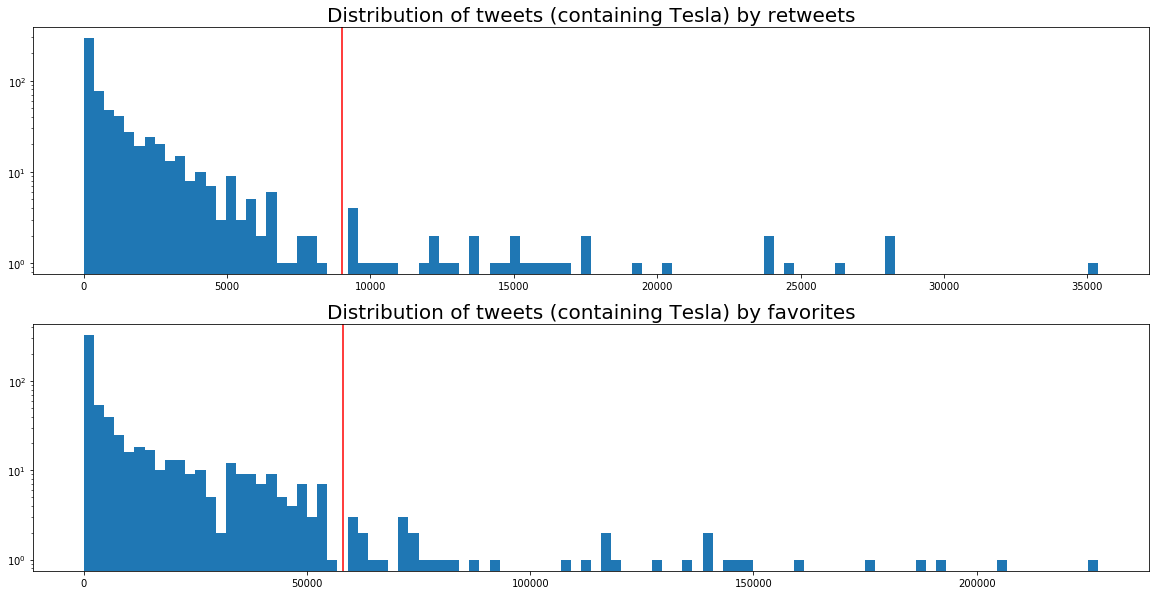

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

ax[0].hist(elon_tesla["retweets"], bins=100)
ax[0].set_yscale('log')
ax[0].axvline(x=9000, color='red')
ax[0].set_title('Distribution of tweets (containing Tesla) by retweets', fontsize=20)

ax[1].hist(elon_tesla["favorites"], bins=100)
ax[1].set_yscale('log')
ax[1].axvline(x=58000, color='red')
ax[1].set_title('Distribution of tweets (containing Tesla) by favorites', fontsize=20)

plt.show()

In [42]:
elon_tesla_top = elon_tesla[(elon_tesla["retweets"]>9000) | (elon_tesla["favorites"]>58000)]
print(elon_tesla_top.shape)
print(elon_tesla_top.shape[0]/elon_tesla.shape[0])

(46, 8)
0.0687593423019432


#### Insights

1. Tweets containing the word Tesla has a fatter tail i.e. exhibit a higher possibility of being highly retweeted or favorited.

2. We can categorize high impact tweets by setting a threshold of >9000 retweets or >58000 favourites.

3. By doing so, there would be about 46 tweets or 6.8% of all his tweets containing the word Tesla.

4. We can further analyze these 46 Tweets against changes in the stock prices.


## Comparing Open-Close Price Change of Top Tesla Tweets

In [43]:
elon_tesla_top = elon_tesla[(elon_tesla["retweets"]>9000) | (elon_tesla["favorites"]>58000)]
elon_tesla_top = elon_tesla_top.drop(columns=['username', 'mentions', 'hashtags', 'permalink'])
elon_tesla_top['stock_date'] = pd.to_datetime(elon_tesla_top['date'].dt.date)

elon_tesla_top.head()

,date,retweets,favorites,text,stock_date
30,2019-03-30 21:37:00,17629,206634,Tesla Semi delivering Tesla cars pic.twitter.c...,2019-03-30
288,2019-02-27 08:21:00,2257,74537,Some Tesla news,2019-02-27
351,2019-02-20 00:15:00,10365,144477,"Tesla made 0 cars in 2011, but will make aroun...",2019-02-20
352,2019-02-20 00:02:00,19220,227229,4000 Tesla cars loading in SF for Europe pic.t...,2019-02-20
383,2019-02-12 19:59:00,5233,71892,To air is human https:// twitter.com/Tesla/sta...,2019-02-12


In [44]:
elon_tesla_top_price = pd.merge(elon_tesla_top,
                           tsla[['Date', 'Open', 'Close']].rename(columns={'Date':"stock_date"}),
                           on='stock_date',
                           how='inner')

elon_tesla_top_price.head()

,date,retweets,favorites,text,stock_date,Open,Close
0,2019-02-27 08:21:00,2257,74537,Some Tesla news,2019-02-27,301.779999,314.739990
1,2019-02-20 00:15:00,10365,144477,"Tesla made 0 cars in 2011, but will make aroun...",2019-02-20,304.410004,302.559998
2,2019-02-20 00:02:00,19220,227229,4000 Tesla cars loading in SF for Europe pic.t...,2019-02-20,304.410004,302.559998
3,2019-02-12 19:59:00,5233,71892,To air is human https:// twitter.com/Tesla/sta...,2019-02-12,316.200012,311.809998
4,2018-12-19 03:12:00,9405,61472,Tesla in @boringcompany tunnel with retractabl...,2018-12-19,337.600006,332.970001


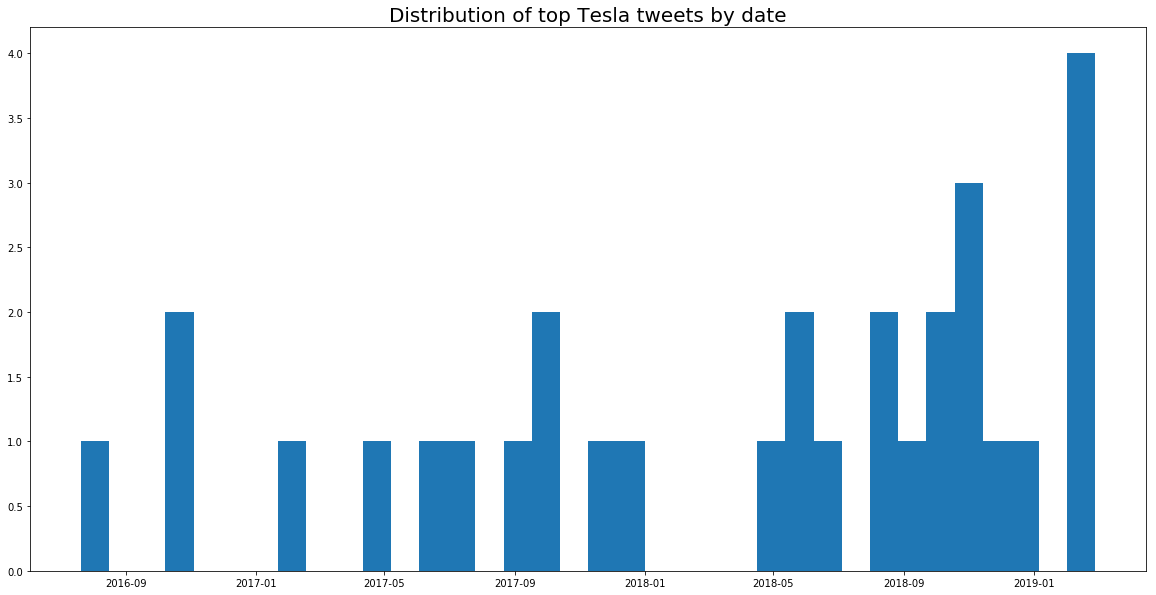

In [45]:
# plot to see recency of top tweets

fig, ax = plt.subplots(figsize=(20,10))

ax.hist(elon_tesla_top_price["date"], bins=36)
ax.set_title('Distribution of top Tesla tweets by date', fontsize=20)
plt.show()

#### Insights:

1. High impact tweets are from the last 3 years
2. This is expected since we set the threshold by retweets and favorites, which increases with his increased followers over time.
3. It is also aligned with our hypthesis that Musk's market moving tweets are only apparent in the last few years.

In [46]:
elon_tesla_top_price["Change"] = elon_tesla_top_price["Close"] - elon_tesla_top_price["Open"]
elon_tesla_top_price["%Change"] = (elon_tesla_top_price["Change"] / elon_tesla_top_price["Open"]) * 100
elon_tesla_top_price.head(50)

,date,retweets,favorites,text,stock_date,Open,Close,Change,%Change
0,2019-02-27 08:21:00,2257,74537,Some Tesla news,2019-02-27,301.779999,314.739990,12.959991,4.294516
1,2019-02-20 00:15:00,10365,144477,"Tesla made 0 cars in 2011, but will make aroun...",2019-02-20,304.410004,302.559998,-1.850006,-0.607735
2,2019-02-20 00:02:00,19220,227229,4000 Tesla cars loading in SF for Europe pic.t...,2019-02-20,304.410004,302.559998,-1.850006,-0.607735
3,2019-02-12 19:59:00,5233,71892,To air is human https:// twitter.com/Tesla/sta...,2019-02-12,316.200012,311.809998,-4.390014,-1.388366
4,2018-12-19 03:12:00,9405,61472,Tesla in @boringcompany tunnel with retractabl...,2018-12-19,337.600006,332.970001,-4.630005,-1.371447
5,2018-11-29 02:25:00,28018,190918,You can summon your Tesla from your phone. Onl...,2018-11-29,347.000000,341.170013,-5.829987,-1.680112
6,2018-11-09 05:01:00,2342,60882,Please lmk what you’d most like improved/fixed...,2018-11-09,349.000000,350.510010,1.510010,0.432668
7,2018-10-29 20:43:00,9930,134932,Deleted my Tesla titles last week to see what ...,2018-10-29,337.470001,334.850006,-2.619995,-0.776364
8,2018-10-25 07:35:00,4194,92402,Massive thanks to Tesla owners & supporters. W...,2018-10-25,317.220001,314.859985,-2.360016,-0.743968
9,2018-10-12 18:03:00,28283,176003,Tesla exists to help reduce risk of catastroph...,2018-10-12,261.000000,258.779999,-2.220001,-0.850575


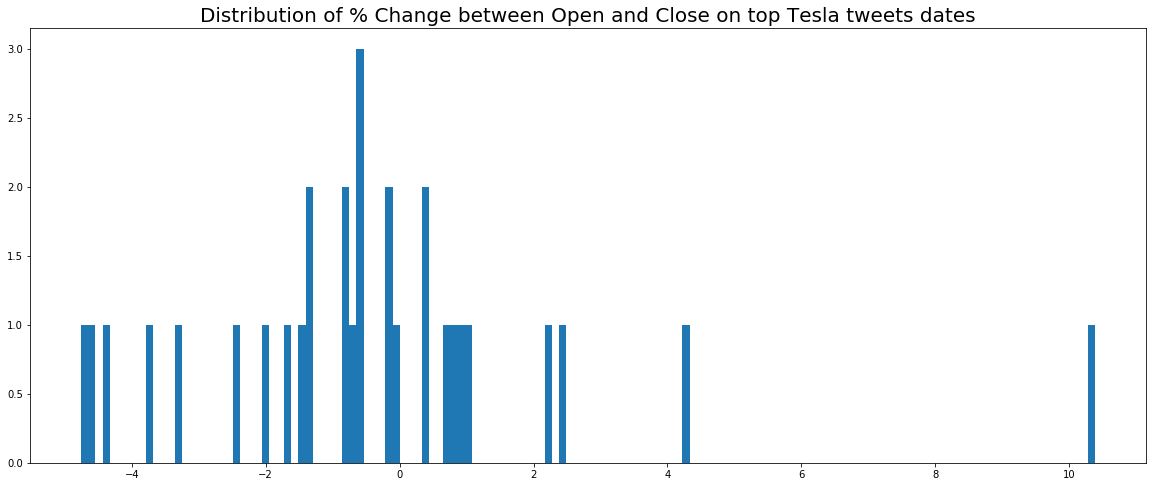

In [47]:
fig, ax = plt.subplots(figsize=(20,8))

ax.hist(elon_tesla_top_price["%Change"], bins=140)
ax.set_title('Distribution of % Change between Open and Close on top Tesla tweets dates', fontsize=20)
plt.show()

In [48]:
tsla_intraday.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,%Change,Range,%Range
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,4.889999,25.736837,7.459999,0.392632
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,-1.960001,-7.599848,7.120001,0.276076
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,-3.040001,-12.160004,5.650000,0.226000
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,-3.799999,-16.521735,4.390001,0.190870
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,-3.889999,-19.449995,4.170000,0.208500


## Check how statistically likely is a 4% change between Open and Close.

In [50]:
std

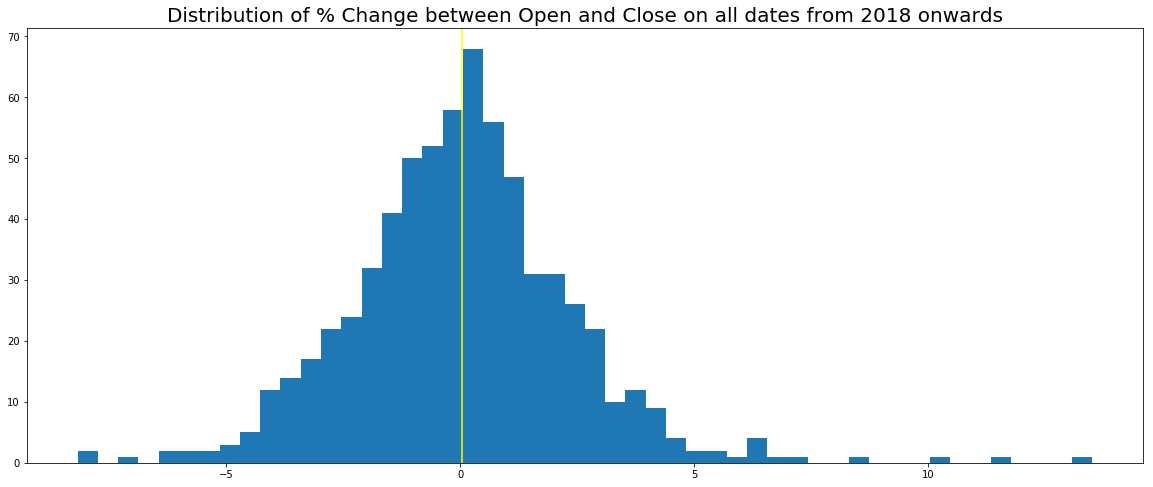

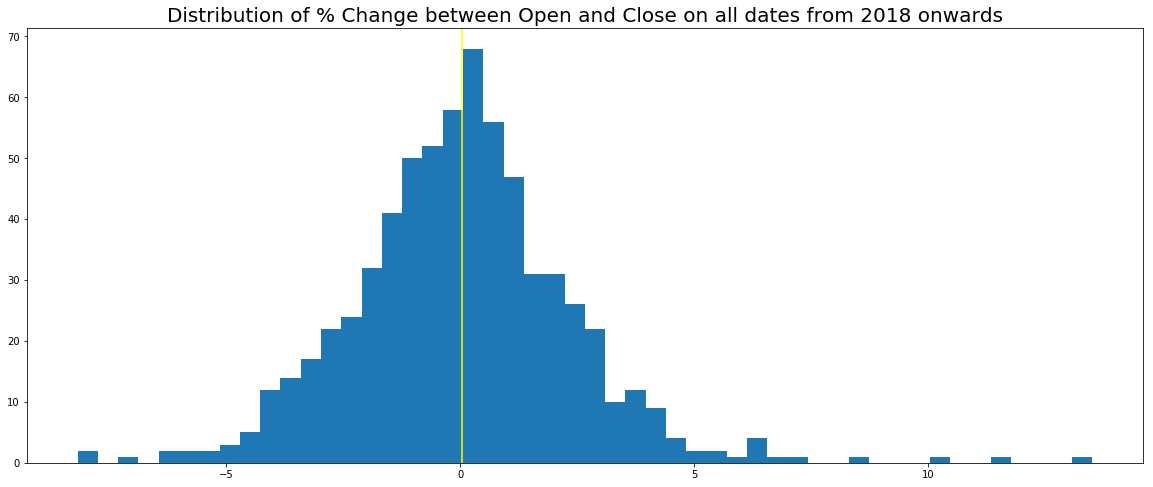

In [53]:
# Check what is the mean % change between Open and Close and the standard deviation
# We will only use data from 2018-08-01 onwards since the top tweets start from that month

mu = np.mean(tsla_intraday[tsla_intraday["Date"]>'2016-08-01']["%Change"])
std = np.std(tsla_intraday[tsla_intraday["Date"]>'2016-08-01']["%Change"])
print("Mean and Standard Deviation are : {0:.4f} and {1:.4f}". format(mu, std))

fig, ax = plt.subplots(figsize=(20,8))

ax.hist(tsla_intraday[tsla_intraday["Date"]>'2016-08-01']["%Change"], bins=50)
ax.set_title('Distribution of % Change between Open and Close on all dates from 2018 onwards', fontsize=20)

ax.axvline(x=mu, color='yellow')
ax.axvline(x=mu+std, color='orange')
ax.axvline(x=mu-std, color='orange')
ax.axvline(x=mu+std*2, color='red')
ax.axvline(x=mu-std*2, color='red')
ax.axvline(x=mu+std*3, color='purple')
ax.axvline(x=mu-std*3, color='purple')


plt.show()

In [54]:
elon_tesla_top.head()

,date,retweets,favorites,text,stock_date
30,2019-03-30 21:37:00,17629,206634,Tesla Semi delivering Tesla cars pic.twitter.c...,2019-03-30
288,2019-02-27 08:21:00,2257,74537,Some Tesla news,2019-02-27
351,2019-02-20 00:15:00,10365,144477,"Tesla made 0 cars in 2011, but will make aroun...",2019-02-20
352,2019-02-20 00:02:00,19220,227229,4000 Tesla cars loading in SF for Europe pic.t...,2019-02-20
383,2019-02-12 19:59:00,5233,71892,To air is human https:// twitter.com/Tesla/sta...,2019-02-12


## Explore the duration of effect of Musk's Top 10 tweets
## Plot Top Tweets before and after prices

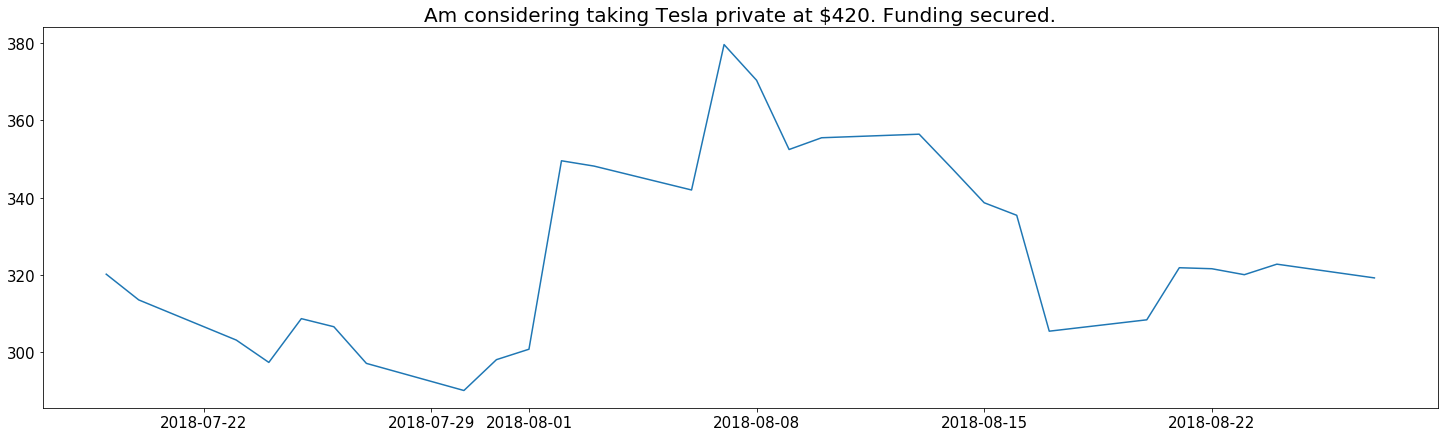

In [56]:
fig, ax = plt.subplots(figsize=(25,7))

for i, row in elon_tesla_top.iterrows():
    
    if i == 1529:
        
        datetime = row["date"]
        text = row["text"]

        # get idx of tsla stock base on datetime of tweet
        next_idx = tsla.index[tsla['Date']>datetime][0]

        # get +/- 7 day range of tesla stock price
        start_idx = next_idx - 14
        end_idx = next_idx + 14

        sub_tsla = tsla.iloc[start_idx: end_idx]

        # plot
        x = sub_tsla["Date"]
        y = sub_tsla["Close"]

        ax.plot(x, y)
        ax.set_title(text, fontsize=20)

        ax.axvline(x=datetime, color='red')
        ax.tick_params('both', labelsize=15)


plt.show()

#### Insights:

1. From the graph, we can see an obvious mis-alignment in the timing of the tweet and the stock market. The Tweet should have been before the spike in Stock Price.
2. Need to what timezone is the TSLA stock price and Tweets record in.

The NASDAQ Stock Market Trading Sessions (Eastern Time) Pre-Market Trading Hours from 4:00 a.m. to 9:30 a.m. Market Hours from 9:30 a.m. to 4:00 p.m. After-Market Hours from 4:00 p.m. to 8:00 p.m.

In [ ]:
fig, ax = plt.subplots(nrows=elon_tesla_top.shape[0], ncols=1, figsize=(25,300))
plot_idx = 0

for i, row in elon_tesla_top.iterrows():
    datetime = row["date"]
    text = row["text"]
    
    # remove https or http URLs
    text = text.split("https://")[0]
    text = text.split("http://")[0]
    text = text.split("pic.twitter")[0]
    
    # split text into 2 or 3 rows if too long
    if len(text.split())>30:
        text = text.split()
        text.insert(14, "\n")
        text.insert(29, "\n")
        text = ' '.join(text)
    elif len(text.split())>15:
        text = text.split()
        text.insert(14, "\n")
        text = ' '.join(text)

    
    # get idx of tsla stock base on datetime of tweet
    next_idx = tsla.index[tsla['Date']>datetime][0]
    
    # get +/- 7 day range of tesla stock price
    start_idx = next_idx - 14
    end_idx = next_idx + 14
    
    sub_tsla = tsla.iloc[start_idx: end_idx]
    
    # plot
    x = sub_tsla["Date"]
    y = sub_tsla["Close"]
    
    ax[plot_idx].plot(x, y)
    ax[plot_idx].set_title(text, fontsize=20)
#     ax[plot_idx].set_xlim((start_date, end_date))
#     ax[plot_idx].set_ylim((y_min, y_max))

    ax[plot_idx].axvline(x=datetime, color='red')
    ax[plot_idx].tick_params('both', labelsize=15)
    
    plot_idx += 1


plt.tight_layout(pad=0.4, h_pad=5.0)
plt.show()

In [ ]:
elon_tesla_top.head(20)